In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import keras
from keras import Sequential
from keras.layers import Dense

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from mlxtend.plotting import plot_decision_regions

In [7]:
df=pd.read_csv(r'F:\Deep Learning Assignments\Assignment-4\Multiple CSV\2.concerticcir1.csv',header=None)

In [8]:
df.head()

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


In [9]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)

<Axes: xlabel='0', ylabel='1'>

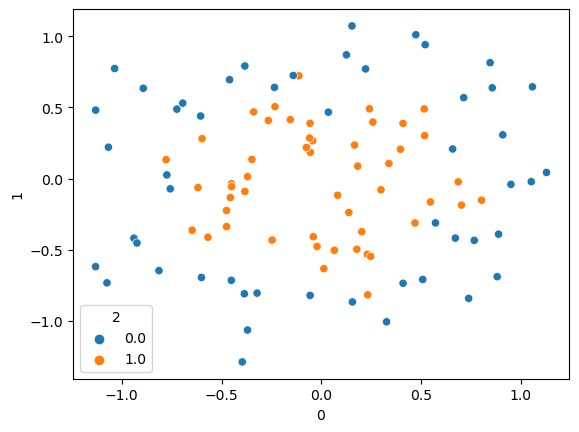

In [10]:
sns.scatterplot(data=df,x=0,y=1,hue=2)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [12]:
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

In [27]:
model=Sequential()
model.add(Dense(10,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(5,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(3,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))

In [28]:
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.1),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
17/17 [==============================] - 2s 33ms/step - loss: 0.7507 - accuracy: 0.5679 - val_loss: 0.9935 - val_accuracy: 0.1111
Epoch 2/20
17/17 [==============================] - 0s 8ms/step - loss: 0.7025 - accuracy: 0.6049 - val_loss: 0.7786 - val_accuracy: 0.4444
Epoch 3/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6476 - accuracy: 0.6543 - val_loss: 0.7501 - val_accuracy: 0.4444
Epoch 4/20
17/17 [==============================] - 0s 8ms/step - loss: 0.5953 - accuracy: 0.7160 - val_loss: 0.7207 - val_accuracy: 0.4444
Epoch 5/20
17/17 [==============================] - 0s 8ms/step - loss: 0.5817 - accuracy: 0.8025 - val_loss: 0.7109 - val_accuracy: 0.4444
Epoch 6/20
17/17 [==============================] - 0s 9ms/step - loss: 0.5798 - accuracy: 0.7407 - val_loss: 0.8782 - val_accuracy: 0.2222
Epoch 7/20
17/17 [==============================] - 0s 8ms/step - loss: 0.5548 - accuracy: 0.7778 - val_loss: 0.6965 - val_accuracy: 0.4444
Epoch 8/20
17/17 [=

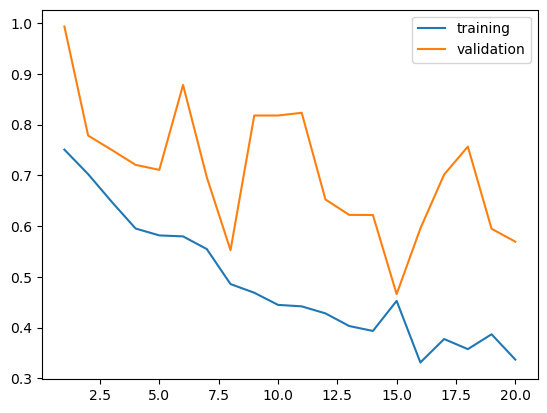

In [29]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 28s 3ms/step


<Axes: >

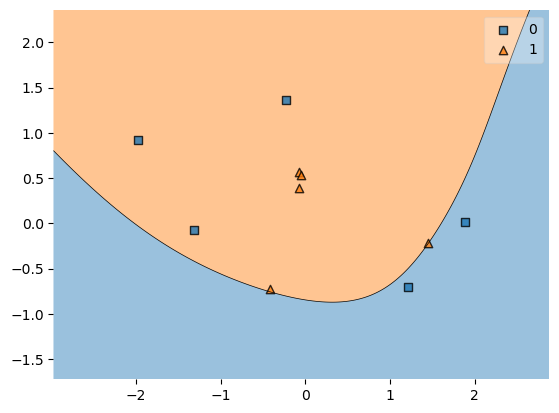

In [24]:
plot_decision_regions(x_testp,y_test.values,clf=model)